## Evaluate metrics with test data

In [1]:
import os
import json
from ultralytics import YOLO
from collections import defaultdict

In [2]:
model = YOLO('./best.pt')

# Load the dataset dictionary
with open('./names.json', 'r', encoding='utf-8') as f:
    classes = json.load(f)

# Initialize counters for each class
class_counts = defaultdict(int)
class_corrects = defaultdict(int)

# Path to the test data folder
test_data_folder = './test'

In [3]:
# # Rename class folders to class number
# for class_folder_name in os.listdir(test_data_folder):
#     class_folder_path = os.path.join(test_data_folder, class_folder_name)
#     if os.path.isdir(class_folder_path):
#         # Check if the class folder name is in the waste_dict
#         for key, value in classes.items():
#             if value==class_folder_name:
#                 new_class_folder_name = key
#                 os.rename(class_folder_path, os.path.join(test_data_folder, new_class_folder_name))
#                 break

In [4]:
# Iterate through each class folder in the test data folder
for class_name in os.listdir(test_data_folder):
    class_folder = os.path.join(test_data_folder, class_name)
    true_class = class_name

    # Iterate through each image in the class folder
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)

        # Predict the class of the image
        results = model.predict(image_path)
        probs = results[0].probs
        predicted_class = results[0].names[probs.top1]

        print(
            f'Predicted: {predicted_class}/{results[0].names[probs.top1]}, True: {true_class}')
        # Update counters
        class_counts[true_class] += 1
        if predicted_class == true_class:
            print(f'Correct Predicted: {predicted_class}, True: {true_class}')
            class_corrects[true_class] += 1


image 1/1 c:\Users\yungo\Downloads\HKMU\456\Project\fyp\model\test\aluminum can\img_11264.jpg: 640x640 aluminum can 1.00, pot 0.00, metal 0.00, disposable meal box 0.00, cosmetic bottle 0.00, 7.0ms
Speed: 19.1ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Predicted: aluminum can/aluminum can, True: aluminum can
Correct Predicted: aluminum can, True: aluminum can

image 1/1 c:\Users\yungo\Downloads\HKMU\456\Project\fyp\model\test\aluminum can\img_11270.jpg: 640x640 aluminum can 1.00, metal 0.00, glass cup 0.00, glass bottle 0.00, dry cell 0.00, 6.0ms
Speed: 16.1ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Predicted: aluminum can/aluminum can, True: aluminum can
Correct Predicted: aluminum can, True: aluminum can

image 1/1 c:\Users\yungo\Downloads\HKMU\456\Project\fyp\model\test\aluminum can\img_11271.jpg: 640x640 aluminum can 1.00, metal 0.00, dry cell 0.00, glass bottle 0.00, seasoning bottle 0.00, 6.5ms


In [7]:
# Calculate accuracy for each class and overall accuracy
class_accuracies = {}
overall_corrects = 0
overall_count = 0

for class_name, correct_count in class_corrects.items():
    total_count = class_counts[class_name]
    accuracy = correct_count / total_count if total_count > 0 else 0
    class_accuracies[class_name] = accuracy
    overall_corrects += correct_count
    overall_count += total_count

overall_accuracy = overall_corrects / overall_count if overall_count > 0 else 0

# Print results
print("Accuracy for each class:")
for class_name, accuracy in class_accuracies.items():
    print(f"{class_name}: {accuracy * 100:.2f}%")

print("\nOverall Accuracy:")
print(f"{overall_accuracy * 100:.2f}%")

Accuracy for each class:
aluminum can: 94.12%
bag: 94.59%
bamboo chopsticks: 96.88%
beverage carton: 66.67%
cardboard: 100.00%
chopping board: 93.62%
cigarette butts: 92.11%
clothes: 81.82%
cosmetic bottle: 75.00%
damaged plastic: 93.88%
disposable meal box: 83.33%
dry cell: 87.23%
edible oil bottle: 97.14%
eggshell: 87.50%
envelope: 100.00%
fish bones: 76.92%
food: 89.80%
fruit peel: 74.29%
fruit pulp: 83.61%
glass bottle: 70.27%
glass cup: 76.00%
large bones: 80.00%
leather shoes: 93.75%
medicines: 87.93%
metal: 75.00%
ointment: 86.49%
paper bag: 88.46%
pillow: 86.27%
plastic bottle: 79.17%
plastic bowl: 91.89%
plastic hanger: 95.83%
plastic toy: 71.88%
plug and cable: 92.13%
plush toy: 93.33%
pot: 96.05%
pots: 87.21%
power bank: 86.79%
seasoning bottle: 77.78%
shampoo bottle: 85.33%
tea residue: 96.15%
toothpick: 66.67%
towel: 66.67%
vegetable waste: 96.05%

Overall Accuracy:
87.58%


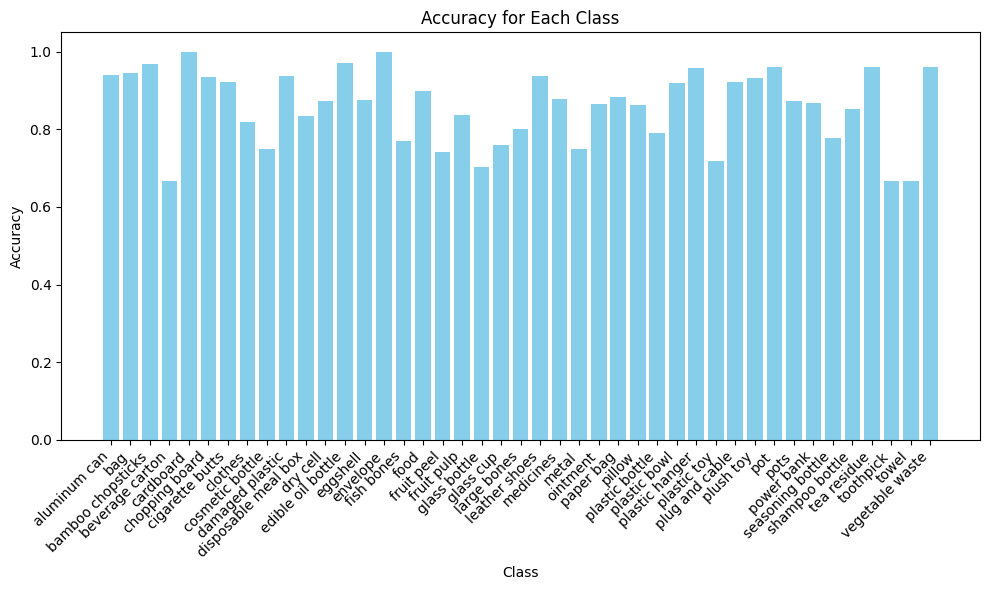

In [9]:
import json
import matplotlib.pyplot as plt

# Save accuracies to a JSON file
with open('class_accuracies.json', 'w') as f:
    json.dump(class_accuracies, f)

# Plot the accuracies
class_names = list(class_accuracies.keys())
accuracies = list(class_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(class_names, accuracies, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [2]:
import json

# Read data from JSON file
with open('class_accuracies.json', 'r') as file:
    data = json.load(file)

# Calculate average accuracy
average_accuracy = sum(data.values()) / len(data)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.8594436350415265


In [1]:
import os

def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                total_images += 1
    return total_images

folder_path = "./test"  # Replace this with the path to your folder
total_images = count_images(folder_path)
print("Total number of images:", total_images)

Total number of images: 1925
